### Default Deep Learning Model on MNIST Dataset

In [ ]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation='relu'))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss. Multi-class classification.
                                                        # Binary would be "binary_crossentropy"
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2623 - accuracy: 0.9236
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1089 - accuracy: 0.9665
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.0912 - accuracy: 0.9724
0.09115768224000931
0.9724000096321106


313/313 [==============================] - 0s 1ms/step
7


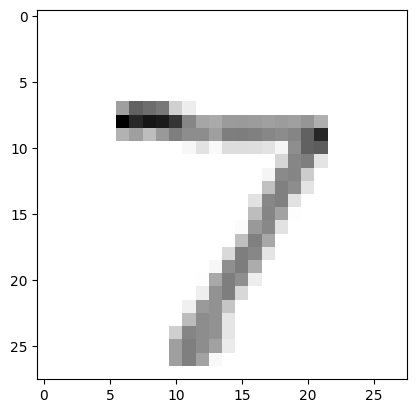

In [ ]:
predictions = model.predict(x_test)

print(np.argmax(predictions[0])) # check the prediction for the first image in the test set
plt.imshow(x_test[0],cmap=plt.cm.binary) # show the first image in the test set
plt.show() 